## <a name="0">**Bank Customer Segmentation**</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore, iqr
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [3]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
1. null values in each column 
2. each column has the proper data type
3. outliers
4. duplicate rows
5. distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
df.head(100)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   C10001    40.900749           0.818182      95.40              0.00   
1   C10002  3202.467416           0.909091       0.00              0.00   
2   C10003  2495.148862           1.000000     773.17            773.17   
3   C10004  1666.670542           0.636364    1499.00           1499.00   
4   C10005   817.714335           1.000000      16.00             16.00   
..     ...          ...                ...        ...               ...   
95  C10100  1139.782882           1.000000       0.00              0.00   
96  C10101  1619.955708           1.000000     739.44            739.44   
97  C10102  3505.671311           1.000000       0.00              0.00   
98  C10103     4.708041           0.363636      79.00              0.00   
99  C10104     0.000000           0.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4      0.000000             0.166667   
1                      0.0   6442.945483             0.000000   
2                      0.0      0.000000             1.000000   
3                      0.0    205.788017             0.083333   
4                      0.0      0.000000             0.083333   
..                     ...           ...                  ...   
95                     0.0    120.612912             0.000000   
96                     0.0      0.000000             0.666667   
97                     0.0   1713.984305             0.000000   
98                    79.0      0.000000             0.250000   
99                     0.0     89.849004             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
1                     0.000000                          0.000000   
2                     1.000000                          0.000000   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
..                         ...                               ...   
95                    0.000000                          0.000000   
96                    0.666667                          0.000000   
97                    0.000000                          0.000000   
98                    0.000000                          0.166667   
99                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
1                 0.250000                 4              0        7000.0   
2                 0.000000                 0             12        7500.0   
3                 0.083333                 1              1        7500.0   
4                 0.000000                 0              1        1200.0   
..                     ...               ...            ...           ...   
95                0.083333                 1              0        1200.0   
96                0.000000                 0             11        6000.0   
97                0.500000                 6              0        4000.0   
98                0.000000                 0              3        7000.0   
99                0.142857                 1              0        3000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.802084        139.509787          0.000000      12  
1   4103.032597       1072.340217          0.222222      12  
2    622.066742        627.284787          0.000000      12  
3      0.000000               NaN          0.000000      12  
4    678.334763        244.791237          0.000000      12  
..          ...               ...               ...     ...  
95   151.823651       2906.110765          0.000000      12  
96   417.128532        389.138517          0.000000      12  
97     0.000000      

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
df.isnull().sum(axis=0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
df[df.duplicated].sum()

CUST_ID                               0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                                0
dtype: object

##### **Outliers Detection**
1. Observational Method:
    - Histogram
    - Scatterplot or Pairplot
    - Boxplot
    - Distplot
2. Statistical Methods:
    - Interquartile Range (IQR)
    - Z-Score

##### **Skewness Detection**
1. Observational Method: 
    - Using Graphs -> such as i did (distplot)
2. Statistical Methods: 
    - Using Formula -> skewness = (3 * (Mean - Median)) / Standard Deviation
    - OR Pandas **skew()** function for calculating skewness for each column.
    - 1 or more -> Highly Left Skewness.
    - -1 or more -> Hoghly Right Skewness.
    - 0 -> No Skewness

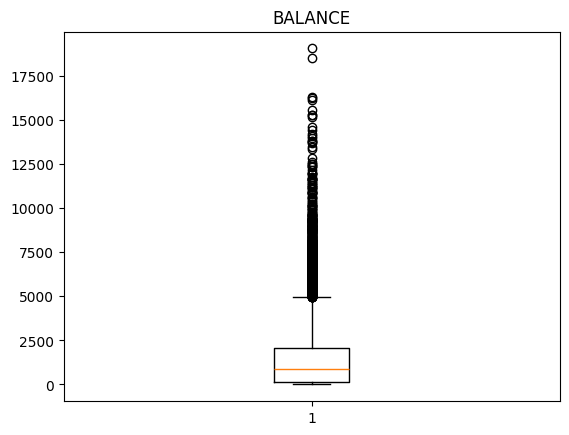

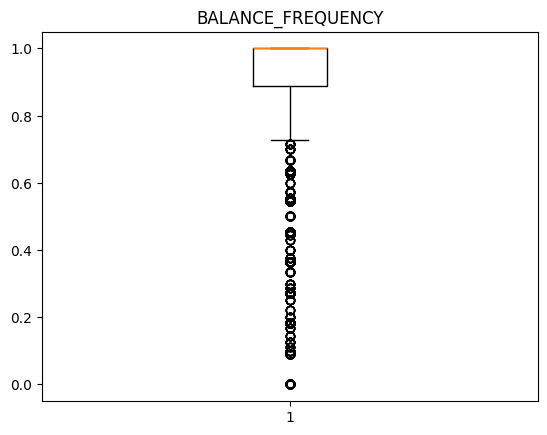

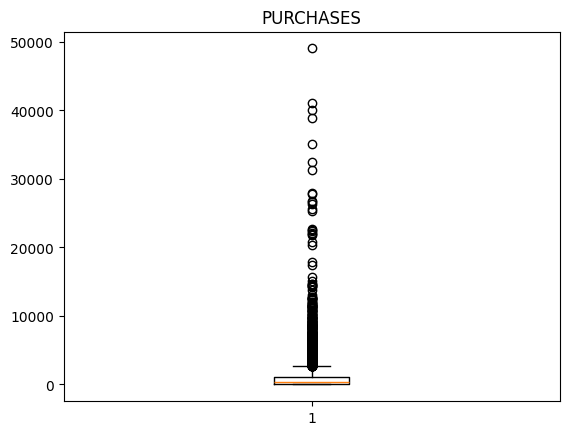

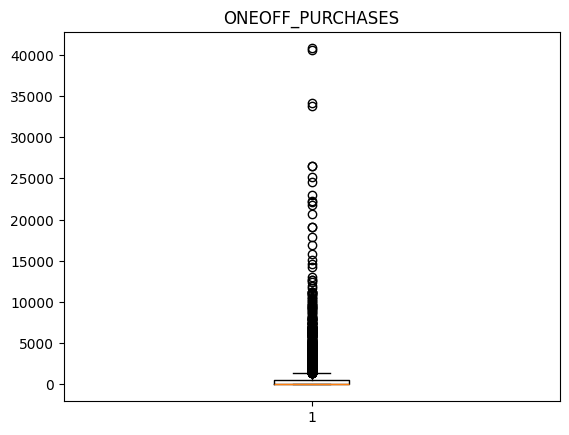

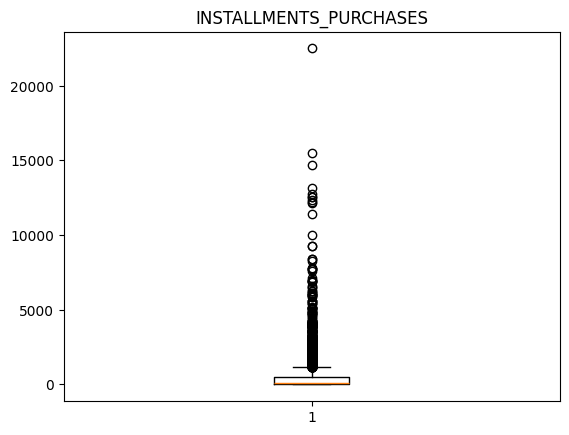

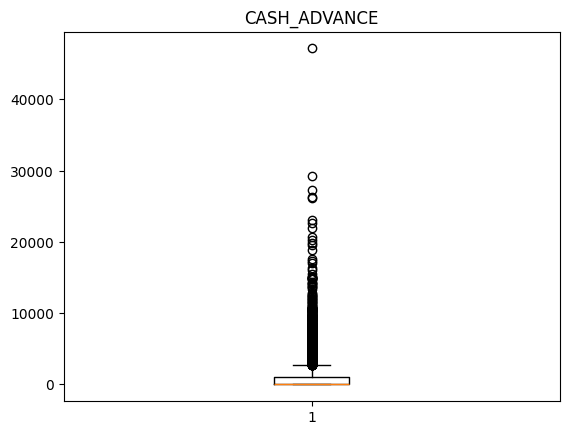

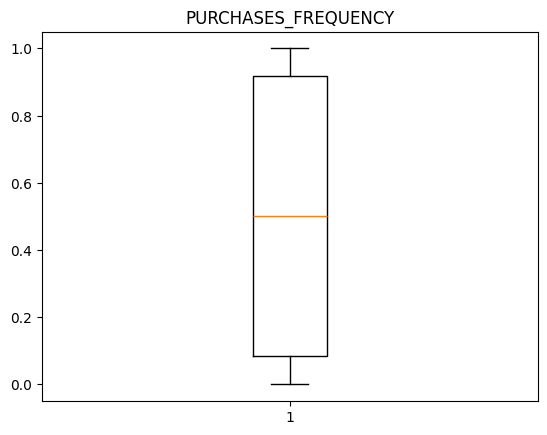

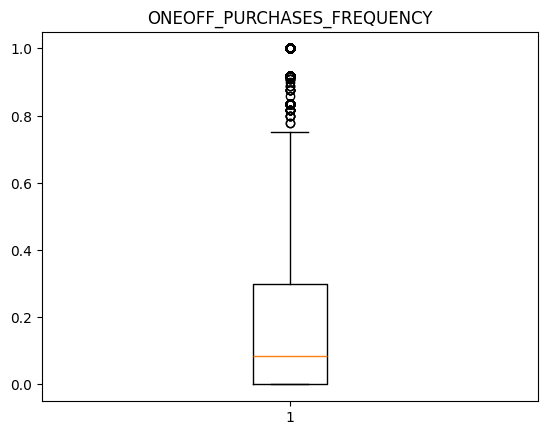

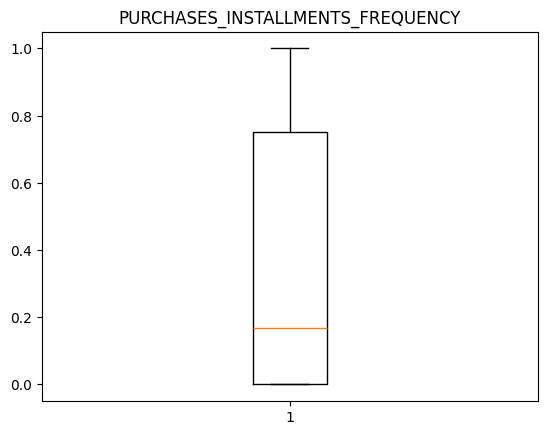

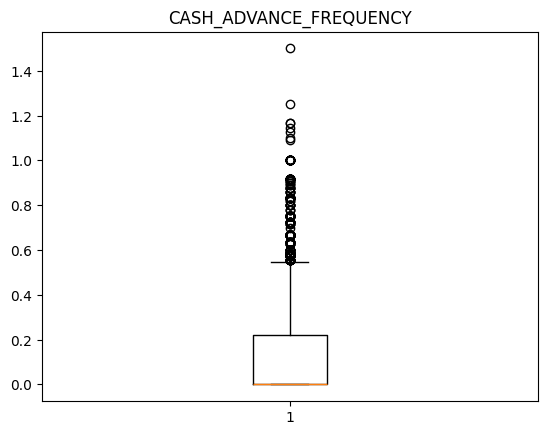

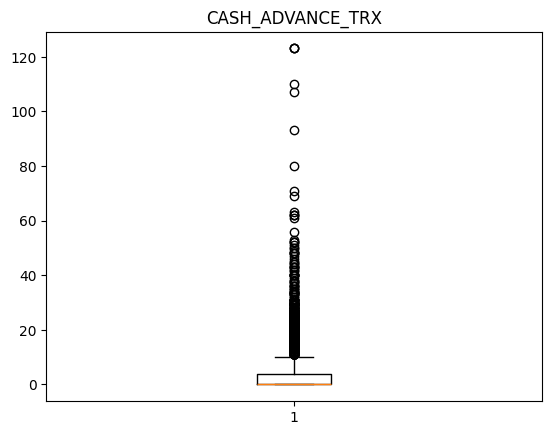

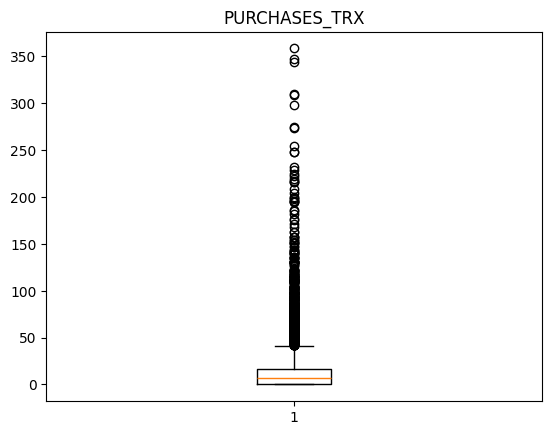

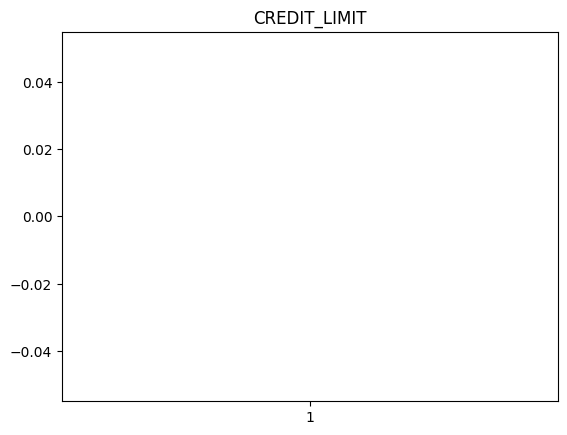

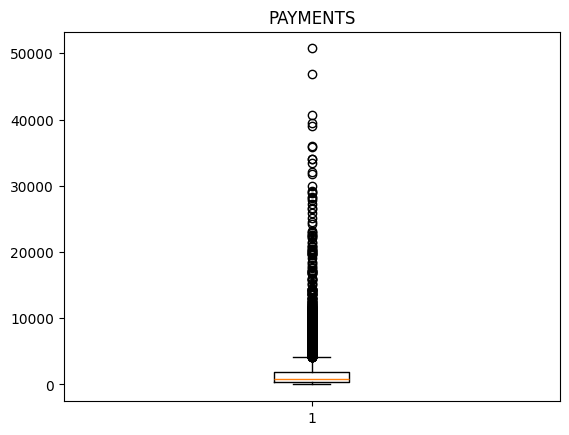

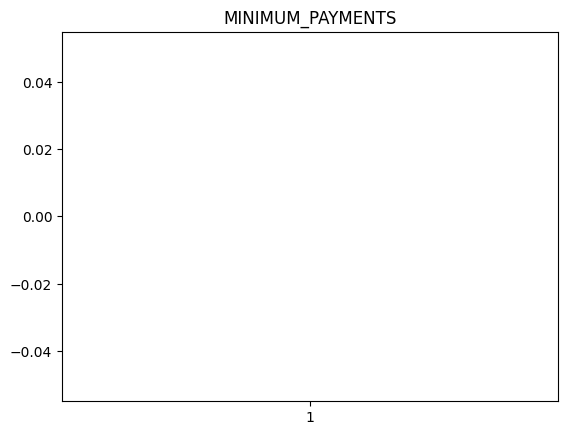

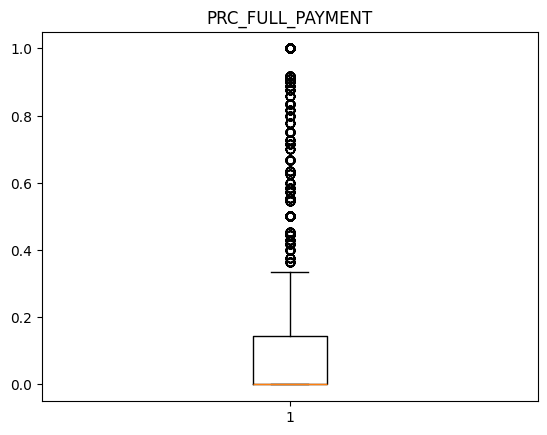

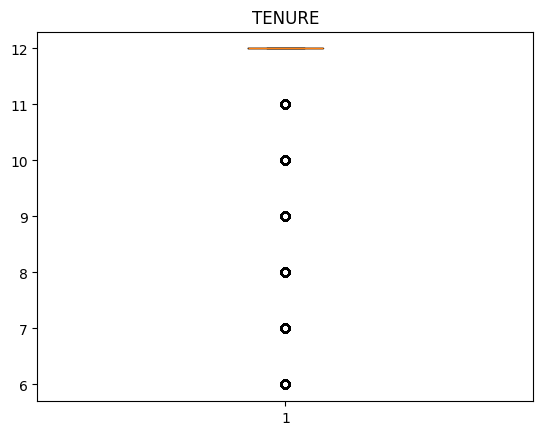

In [9]:
for column in df.columns[1:]:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

In [10]:
df.iloc[:, 1:].skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [11]:
for column in df.columns[1:]:
    print(column, f": [{np.min(df[column])}, {np.max(df[column])}]")

BALANCE : [0.0, 19043.13856]
BALANCE_FREQUENCY : [0.0, 1.0]
PURCHASES : [0.0, 49039.57]
ONEOFF_PURCHASES : [0.0, 40761.25]
INSTALLMENTS_PURCHASES : [0.0, 22500.0]
CASH_ADVANCE : [0.0, 47137.21176]
PURCHASES_FREQUENCY : [0.0, 1.0]
ONEOFF_PURCHASES_FREQUENCY : [0.0, 1.0]
PURCHASES_INSTALLMENTS_FREQUENCY : [0.0, 1.0]
CASH_ADVANCE_FREQUENCY : [0.0, 1.5]
CASH_ADVANCE_TRX : [0, 123]
PURCHASES_TRX : [0, 358]
CREDIT_LIMIT : [50.0, 30000.0]
PAYMENTS : [0.0, 50721.48336]
MINIMUM_PAYMENTS : [0.019163, 76406.20752]
PRC_FULL_PAYMENT : [0.0, 1.0]
TENURE : [6, 12]


**Notes**
1. There are null values at column CREDIT_LIMIT (1, percentage 0.01) and column MINIMUM_PAYMENTS (313, percentage 3.5) 
2. All columns with consistant datatypes.
3. From **Boxplot**, There are outliers in all columns, except columns PURCHASES_INSTALLMENTS_FREQUENCY , PURCHASES_FREQUENCY nearly.
4. No duplicates in all dataset.
5. From Function **Skew()** Output, There is a huge skewness in the distribution of each feature (column) nearly, Except PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_FREQUENCY Columns.
6. Also there are features with large range of values (for example: Payments column: [0, 50,000]) and other features with very small range [0, 1].
7. I should to solve the problem of outliers or skewness because the performence of models that i will use later will be very bad because of outliers or what called tail region in skewed distribution
8. Then start to see what should i do with range of features.

## 3. <a name="3">Data Preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1. The first column is categorical not important at all
2. There are null values at column CREDIT_LIMIT (1, percentage 0.01) and column MINIMUM_PAYMENTS (313, percentage 3.5)          <br>
3. There are outliers in all columns, except columns PURCHASES_INSTALLMENTS_FREQUENCY , PURCHASES_FREQUENCY nearly.         <br>
4. There is a huge skewness in the distribution of each feature (column).          <br>
5. There are different ranges in features of data.

In [4]:
df = df.iloc[:, 1:]

In [13]:
df.head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12

### For Each Issue Adapt This Methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue** 
- Missing Values
  - Deletion.
    1. Pairwise Delection: when values are missing completely at random (MCAR). -> only the missing values are deleted.
    2. Listwise Deletion/ Dropping Rows: MCAR also -> complete rows the contain themissing values are deleted.
    3. Dropping Complete Columns: when nulls are about 80% or more and the feature isn't important.

  - Imputation for Non Time Series Data.
    1. Using Constant.
    2. Using Statistics: Mean, Median, Mode
    - **SimpleImputer()**: class in sklearn with above options
    
  - Imputation for Time Series Data.
    1. 'ffill' or 'pad': Replace nulls with last observed values.
    2. 'bfill' or 'backfill': Replace nulls with next obseved values.
    - **fillna()**: function in pandas with above options for parameter **method**.
    3. Linear Interpolation Method: technique that assumes linear relationship among data points and utilises non-missing values from adjacent data points to compute a value for a minssing data point.
    - **interpolate()**: function in pandas.

  - Advanced Imputation Techniques.
    - Using ML Algorithms to impute missing values.
    1. Nearest Neighbors Imputation: Use **KNNImputer()**: Class in **sklearn.impute**
    2. Multivariante Imputation by Chained Equations

  - Algorithms Handle Missing Values without Any Preprocessing.
    1. XGBoost
    2. LightGBm


- Because the percentage of nulls in CREDIT_LIMIT is 0.01% (1) and MINIMUM_PAYMENTS is 3.5% (313) which is a small percentage, so i will impute these values not delete them.
- Also the data in these columns is non time series data, So:
   - Imputation for Non Time Series Data
      1. Using Constant.
         - So now i try to find if there is a relation betwwen those features and others in data, to help me in choosing the value of imputation.
      2. Using Statistics: Mean, Median, Mode
         - If there is no relation, i will go to the idea of choosing the best statistic to fill the data using it.

   - Advanced Imputation Techniques.
      1. I will use **KNNImputer()** in this case.

In [14]:
len(df[df['MINIMUM_PAYMENTS'].isna() & (df['PAYMENTS'] == 0)])

240

I find relation but that 240 from 313 null rows in minium_payments have 0 value for payment feature, but in the same time imputing by 0 won't be right because as i understood, customer may have minimum payments he should pay but he didn't pay everything until data collection. so i will try these two options.
1. **Impute with Median**: Because the data are skewed, i will fill it with medium not mean.
2. **Impute with KNNImputer()** 

In [5]:
df1 = df.copy()
df2 = df.copy()

In [6]:
# solution 
df1['MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].median())
df1['CREDIT_LIMIT'] = df1['CREDIT_LIMIT'].fillna(df1['CREDIT_LIMIT'].median())

In [17]:
#test 
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
df2 = pd.DataFrame(KNNImputer().fit_transform(df2), columns=df2.columns)

In [19]:
df2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue**
- Outliers

- Column 'CASH_ADVANCE_FREQUENCY': Should contain frequencies in the range of [0, 1] but there are values > 1, So I should handle it.
- I will set all (values > 1) = 1
- I know accourding the visuals, there are many outliers in almost all features. But these values have high probability to be a real or actual data.
- But the column 'CASH_ADVANCE_FREQUENCY' values > 1, I'm sure that it's wrong values so should handle it now.

In [7]:
# Solution
df1.loc[df1['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] = 1

In [8]:
# Test
df1[df1['CASH_ADVANCE_FREQUENCY'] > 1]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

**Third issue**
- Skewness (Transformation)
    - Function Transformation
        1. Log Transformation
            - Not applied to those features wi negative values.
            - Right-skewed data.
        2. Reciprocal
            - Not defined for zero.
        3. Square
            - Applies to left-skewed data.
        4. Square Root
            - Only for positive numbers.
            - Weaker than Log Transformation.
            - Reducing the skewness of right-skewed data.
    - Power Transformation
        1. Box-Cox
            - Data should be positive(not even zero is acceptable).
            - Sqrt - Log
        2. Yeo-Johnson
            - Data have zeroes or negative value.
    - Quantile transformation

1. **Right-Skewed Features**
    - 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'

In [9]:
right = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [10]:
# solution 
for i in right:
    df1[i] = np.log(df1[i] + 1)

In [24]:
# test
df1.iloc[:, 1:].skew()

BALANCE_FREQUENCY                  -2.023266
PURCHASES                          -0.764492
ONEOFF_PURCHASES                    0.185854
INSTALLMENTS_PURCHASES             -0.024981
CASH_ADVANCE                        0.262594
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.535613
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.788607
CASH_ADVANCE_TRX                    0.940131
PURCHASES_TRX                       0.032697
CREDIT_LIMIT                       -0.101408
PAYMENTS                           -1.778312
MINIMUM_PAYMENTS                    0.269703
PRC_FULL_PAYMENT                    1.746046
TENURE                             -2.943017
dtype: float64

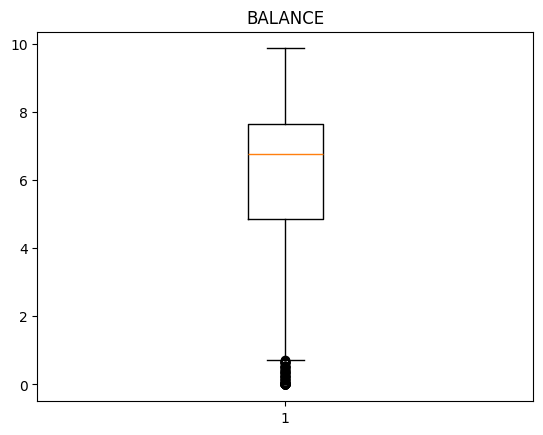

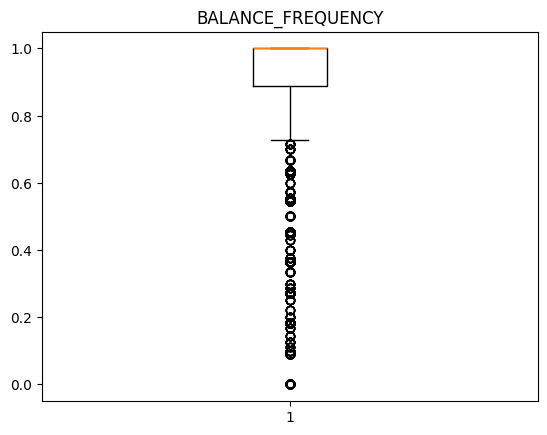

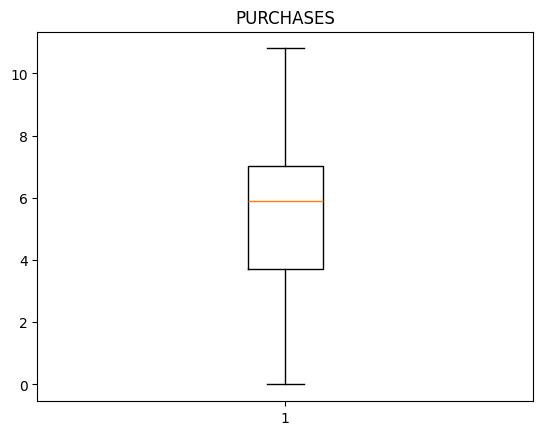

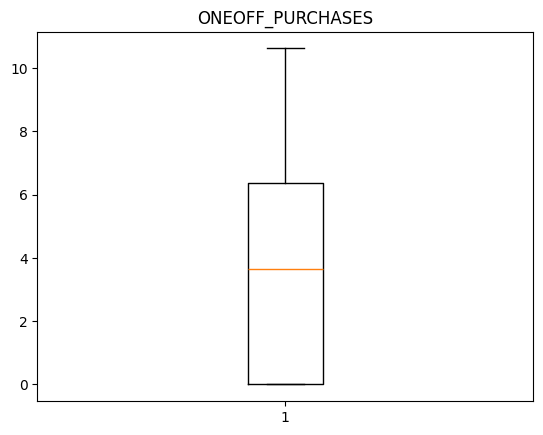

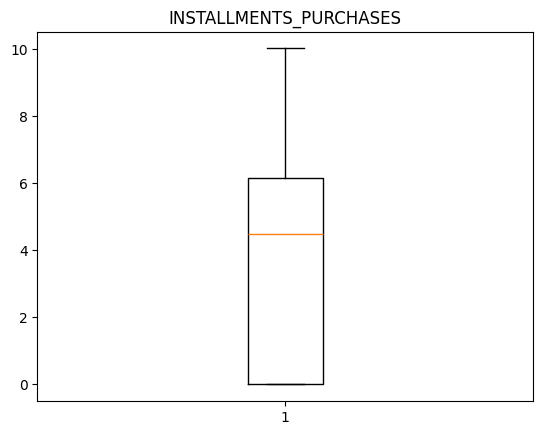

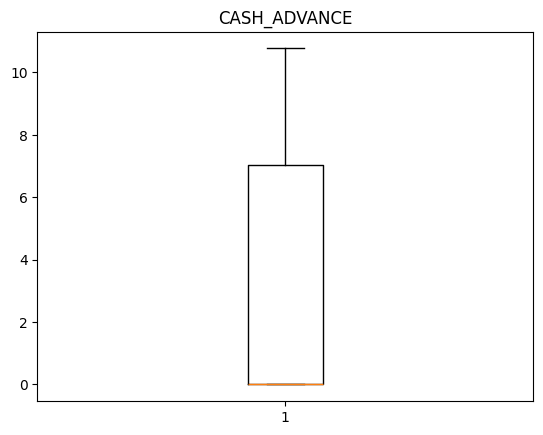

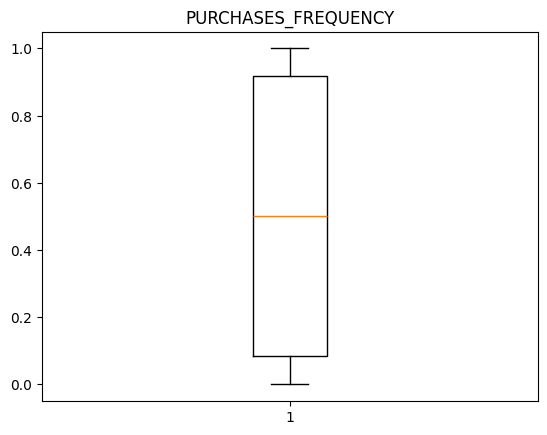

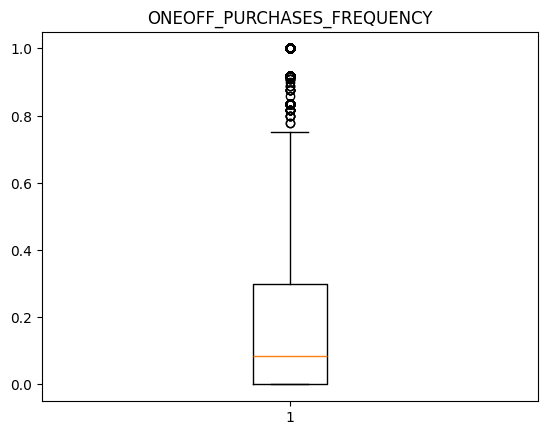

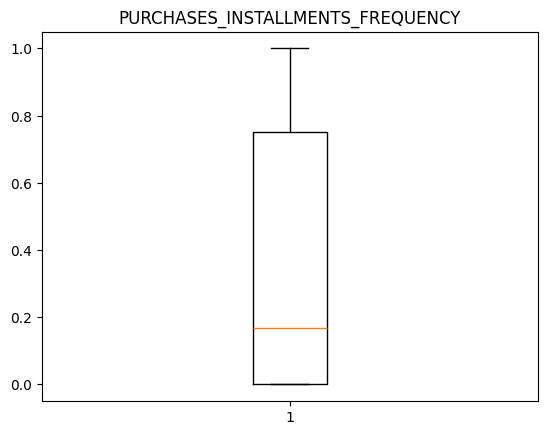

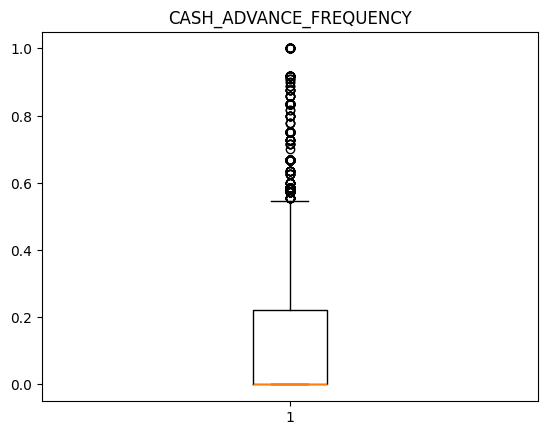

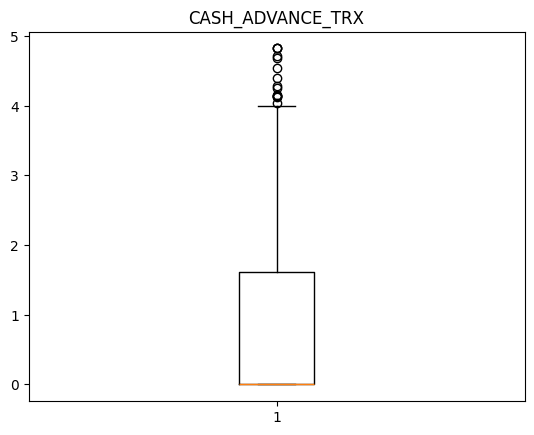

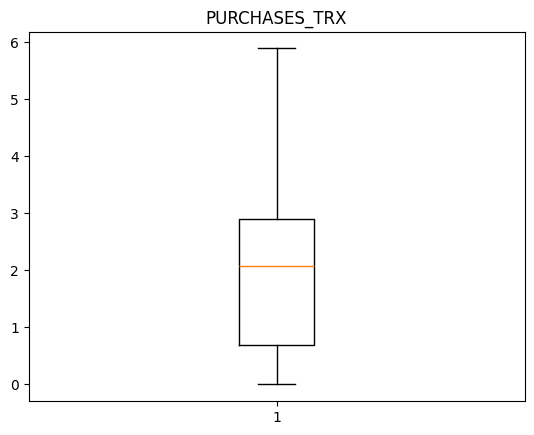

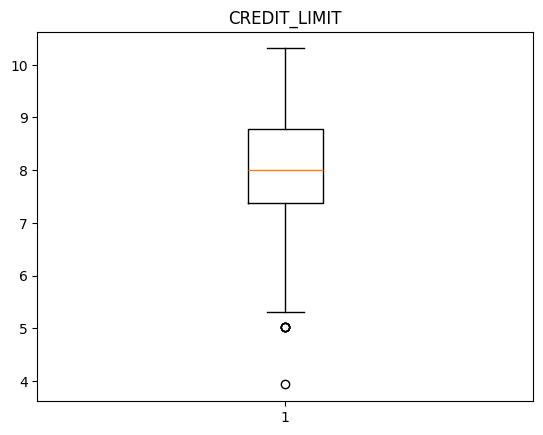

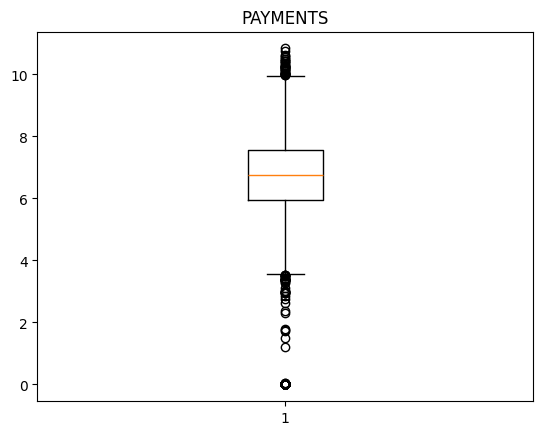

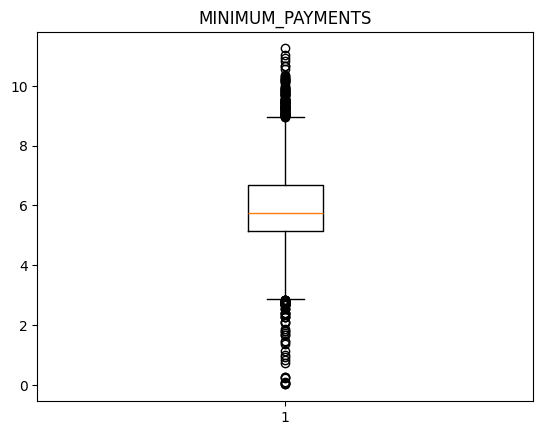

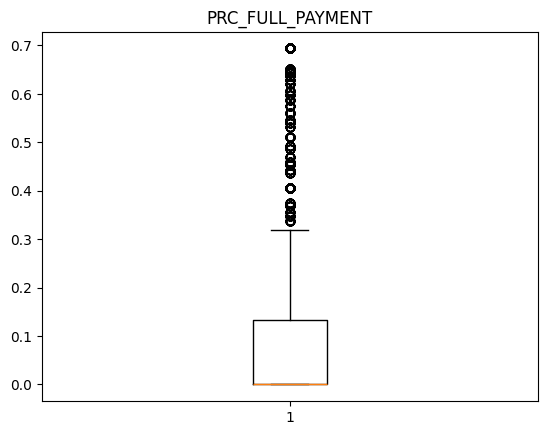

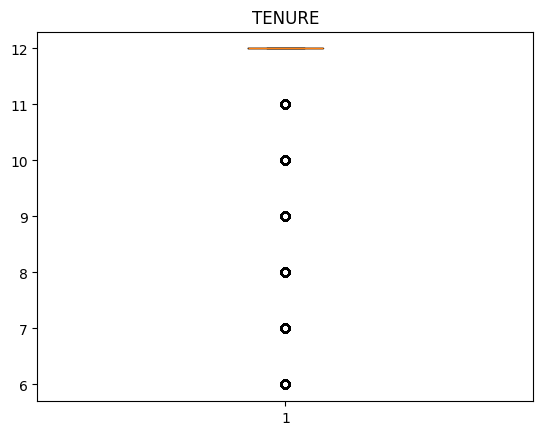

In [25]:
for column in df1.columns:
    plt.boxplot(df1[column])
    plt.title(column)
    plt.show()

**Notes**
- After trying many types of transformation, Log Transformation showed the best results.
- In my way to handle the skewness, the outliers also were handled and reduced.
- I think there is no need to handle the remaining outliers by remove it or any thing like that because it's a real data nor unexpectable.
- I think i'm satisfied about this result.

## 4. <a name="4">Features Transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

- If i decided to use a type of scalling to apply on data instead of using log/cbrt transformation, I prefer using robust scaler because the data has many outliers and robust scaler is robust against outliers.

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1. Use the k means class that you implemented in the previous task to cluster this data
2. Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3. Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4. (Optionally) make a method that pick the best number of clusters for you 
5. Using different techniques for scaling and comment on the result

In [11]:
class K_means:

    def __init__(self, n_clusters = 8, max_iter = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
             
        indexes = np.random.randint(0, len(X), self.n_clusters)
        centroids = X[indexes, :]

        for i in range(self.max_iter):
            
            distances = np.zeros((len(X), len(centroids))) 
            for i in range(len(centroids)):
                distances[:, i] = np.sum((X - centroids[i]) ** 2, axis = 1)
                idx = distances.argmin(axis = 1)

            centroids = np.zeros((self.n_clusters, X.shape[1]))  
            for i in range(self.n_clusters):
                centroids[i,:] = np.mean(X[idx == i], axis = 0)

        return centroids, idx
    
    def predict(self, centroids, X):
        
        distances = np.zeros((len(X), len(centroids))) 

        distances[:, 1] = np.sum((X - centroids) ** 2, axis = 1)
        label = distances.argmin(axis = 1)
        
        return label

-----------------------------------------------------------------

**Methods For Finding The Optimal Value of Clusters in KMeans**
1. Elbow Method.
2. Silhouette Coefficient.

**Elbow Method**

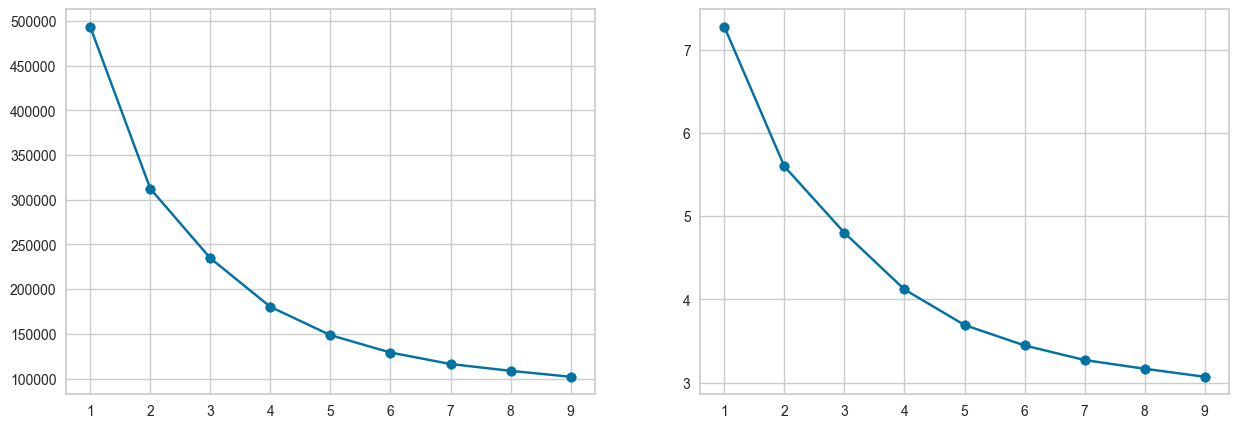

In [28]:
n_clusters = range(1, 10)
inertia = []
distortion = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n).fit(df1)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(df1, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df1.shape[0])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(n_clusters, inertia)
ax[0].plot(n_clusters, inertia, label='inertia')
ax[1].scatter(n_clusters, distortion)
ax[1].plot(n_clusters, distortion, label='distortion')


148621.3066270876


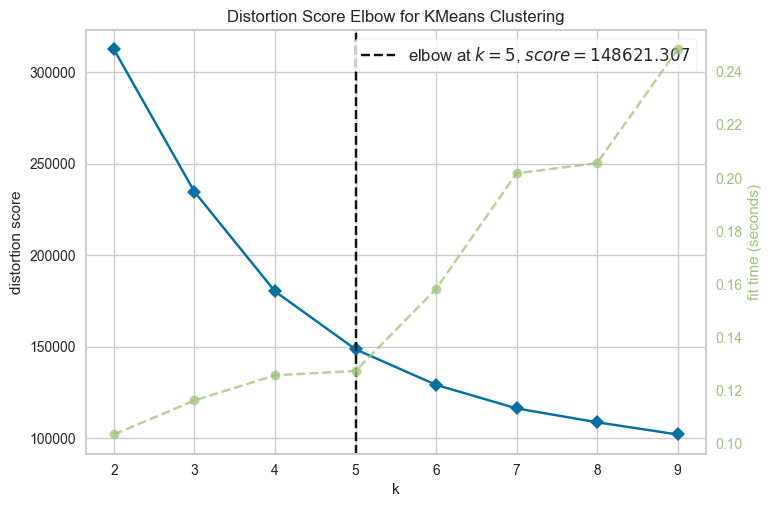

0.42741029678519826


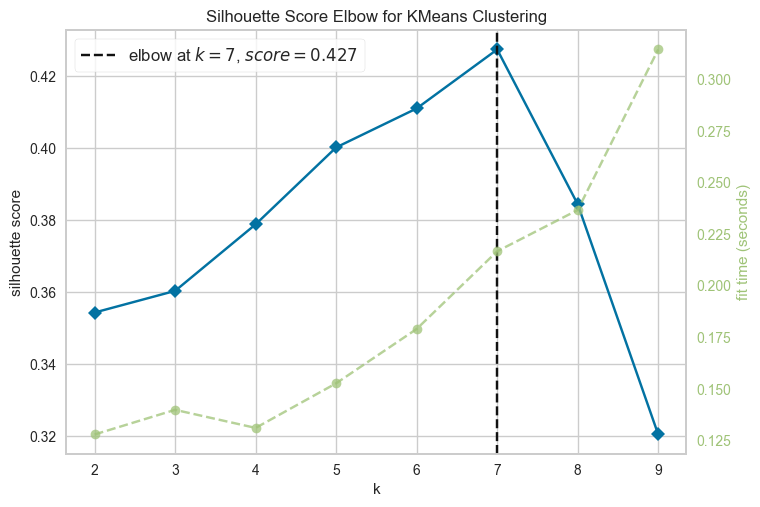

In [29]:
metrics = ['distortion', 'silhouette']
for metric in metrics:
    km = KMeans(random_state=0)
    visualizer = KElbowVisualizer(km, k=(2,10), metric=metric)
    visualizer.fit(df1)
    print(visualizer.elbow_score_)
    visualizer.show() 

**Silhouette Method**

In [30]:
for i in range(2, 10):
    km = KMeans(n_clusters=i, random_state=0)
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(df1)
    print(f"{i} clusters = {visualizer.silhouette_score_}")
plt.close()

2 clusters = 0.3542931249795275
3 clusters = 0.3603113520866495
4 clusters = 0.3788086435315024
5 clusters = 0.400186740667942
6 clusters = 0.4110187263075361
7 clusters = 0.42741029678519826
8 clusters = 0.384405802134394
9 clusters = 0.3204019758521601


In [ ]:
# from sklearn.metrics import silhouette_score

# n_clusters = range(2, 10)
# avg = []
# for n in n_clusters:
#     kmeans = KMeans(n_clusters=n).fit(df1)
#     avg.append(silhouette_score(df1, kmeans.labels_))

# plt.scatter(n_clusters, avg)
# plt.plot(n_clusters, avg)

- Elbow  (Inertia ot Distortion):  k = 5
- Silhouette (Graph or Scores):   K = 7
- I will try another method to decide that is T-SNE to visualize the data and know the number of cluster that i can represent the data in.

**T-SNE**

- For now, I will set K = 5

In [12]:
kmeans = K_means(n_clusters=5)
centroids, idx = kmeans.fit(df1.values)

In [32]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(df1))

<Axes: xlabel='0', ylabel='1'>

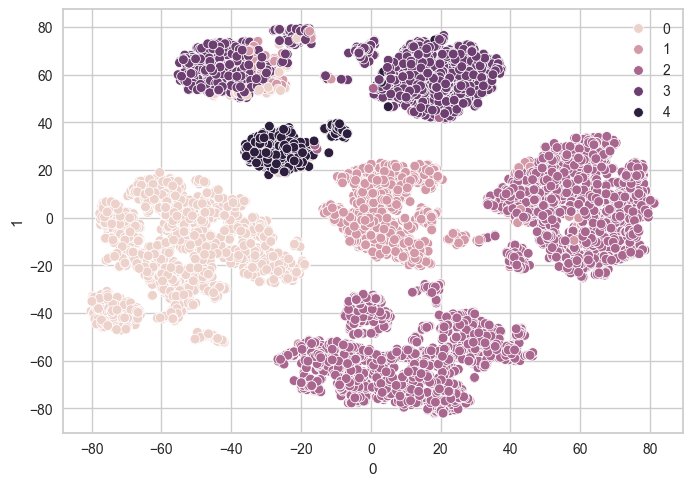

In [33]:
sns.scatterplot(df_tsne, x=0, y=1, hue=idx)

- Accourding to T-SNE, Maybe k = 7 is suitable  

- Elbow:  k = 5
- Silhouette:   k = 7
- T-SNE: k = 7

-------------------------------------------------------------------------

**From Scratch K-Means**
- Best Parameters

In [13]:
kmeans = K_means(n_clusters=7)
centroids, idx = kmeans.fit(df1.values)

<Axes: xlabel='0', ylabel='1'>

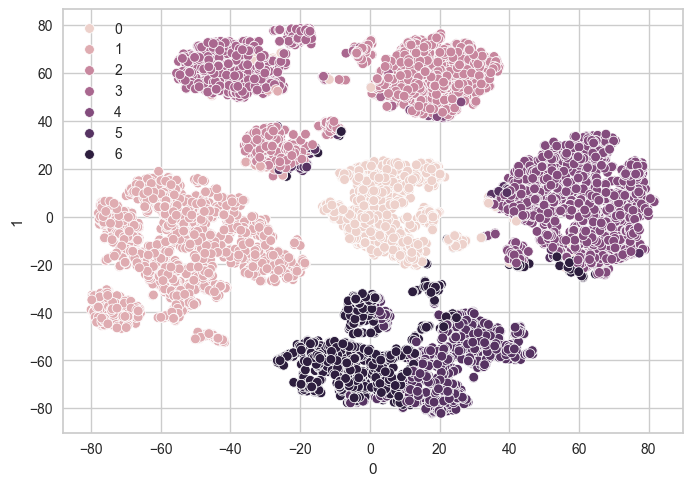

In [16]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(df1))
sns.scatterplot(df_tsne, x=0, y=1, hue=idx)

**Sklearn K-Means**

In [18]:
kmeans_ = KMeans(n_clusters=7, init='k-means++').fit(df1)

<Axes: xlabel='0', ylabel='1'>

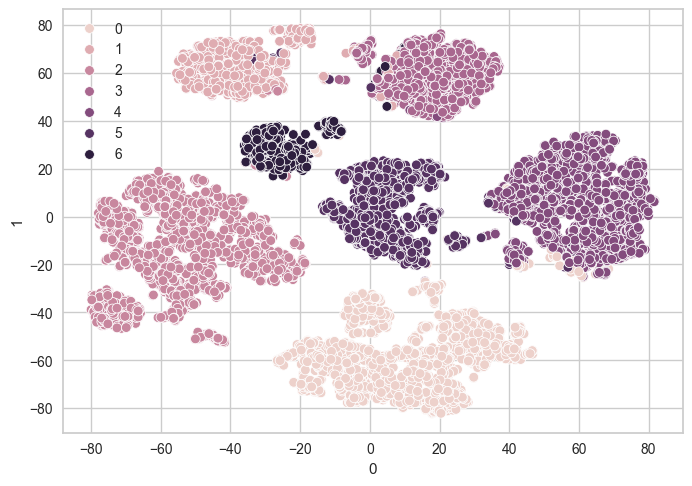

In [19]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(df1))
sns.scatterplot(df_tsne, x=0, y=1, hue=kmeans_.labels_)

In [154]:
silhouette_score(df1, kmeans_.labels_)

0.42741029678519826

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1. Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2. Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3. Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

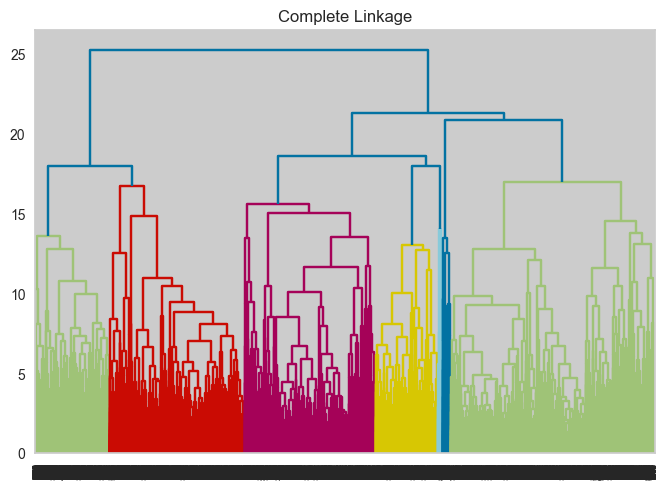

In [22]:
import scipy.cluster.hierarchy as shc
plt.title("Complete Linkage")
dend = shc.dendrogram(shc.linkage(y=df1 , method='complete', metric='euclidean')) 
#fill y with your dataframe
#and method with linkage criteria
#and metric with distance function

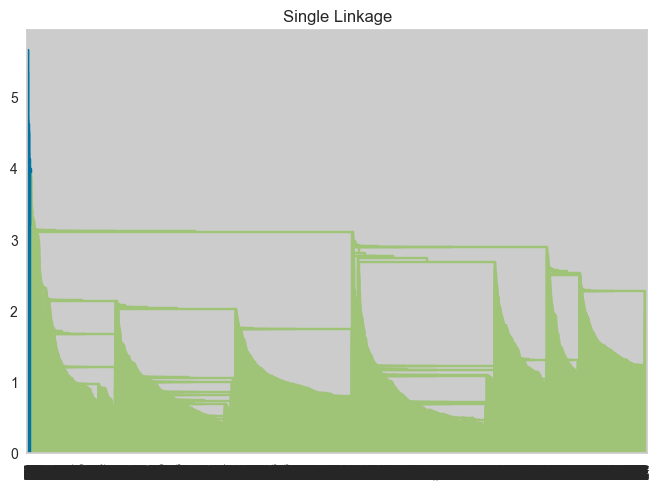

In [23]:
plt.title("Single Linkage")
dend = shc.dendrogram(shc.linkage(y=df1 , method='single', metric='euclidean')) 

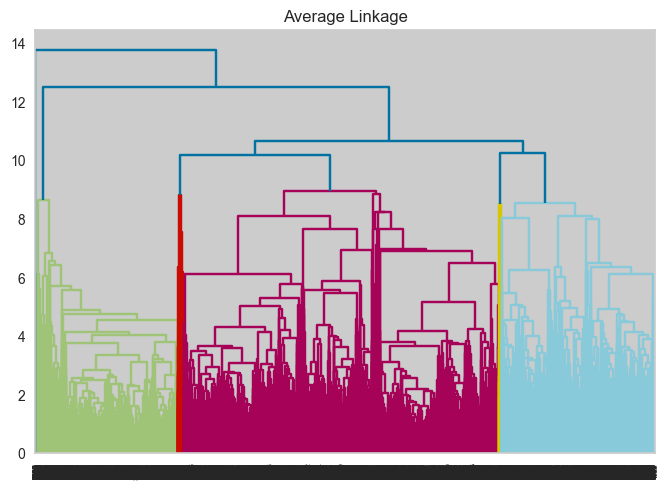

In [25]:
plt.title("Average Linkage")
dend = shc.dendrogram(shc.linkage(y=df1 , method='average', metric='euclidean')) 

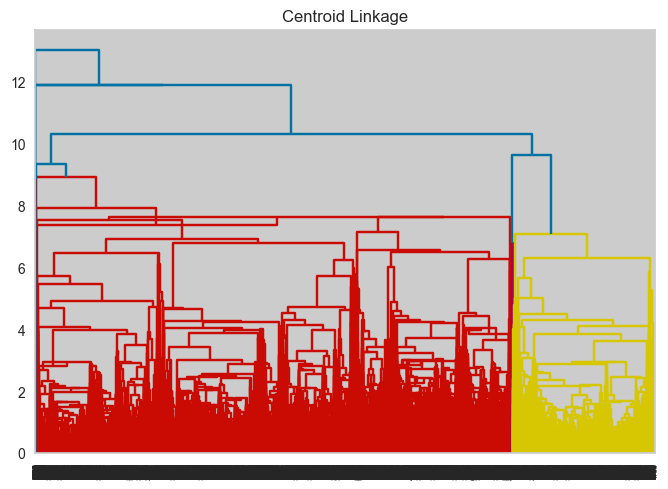

In [26]:
plt.title("Centroid Linkage")
dend = shc.dendrogram(shc.linkage(y=df1 , method='centroid', metric='euclidean')) 

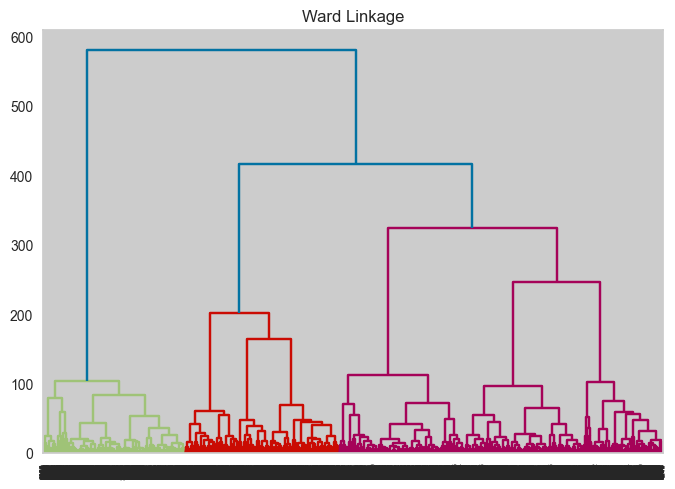

In [27]:
plt.title("Ward Linkage")
dend = shc.dendrogram(shc.linkage(y=df1 , method='ward', metric='euclidean')) 

- After trying the different metrics (complete - average - centroid - single - ward)
- Complete Linkage showed clustering tree where k = 7, I will choose it.

In [130]:
#training
from sklearn.cluster import AgglomerativeClustering

**Hierarchical Clustering (Agglomerative Clustering)**

- K = 7 from **Dendrogram**

In [131]:
hierarch = AgglomerativeClustering(n_clusters=7).fit(df1)

<Axes: xlabel='0', ylabel='1'>

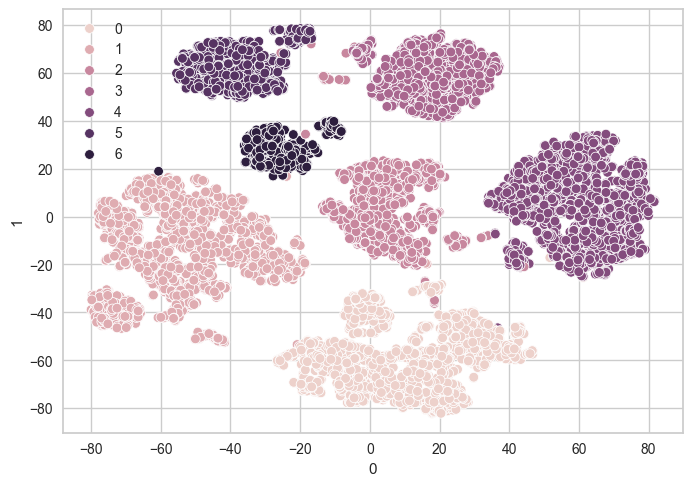

In [56]:
sns.scatterplot(df_tsne, x=0, y=1, hue=hierarch.labels_)

In [153]:
silhouette_score(df1, hierarch.labels_)

0.41917219622670254

- Agglomerative Clustering made good results as kmeans(kmean++ initialized)

## 6. <a name="6">Improvement Ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

**PCA**

In [57]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [65]:
df_pca = pd.DataFrame(PCA(n_components = 6, random_state = 0).fit_transform(df1))

In [66]:
hierarch_pca = AgglomerativeClustering(n_clusters=7).fit(df_pca)

<Axes: xlabel='0', ylabel='1'>

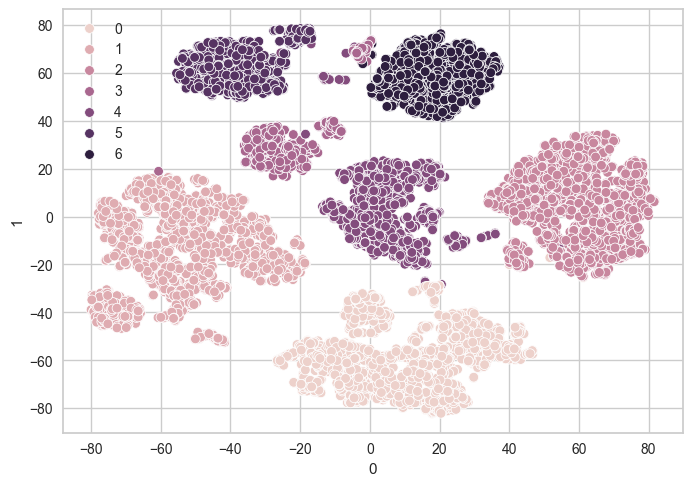

In [67]:
sns.scatterplot(df_tsne, x=0, y=1, hue=hierarch_pca.labels_)

**Kernal PCA**

In [62]:
df_kernal_pca = pd.DataFrame(KernelPCA(n_components = 6, random_state = 0).fit_transform(df1))

In [63]:
hierarch_kernal_pca = AgglomerativeClustering(n_clusters=7).fit(df_kernal_pca)

<Axes: xlabel='0', ylabel='1'>

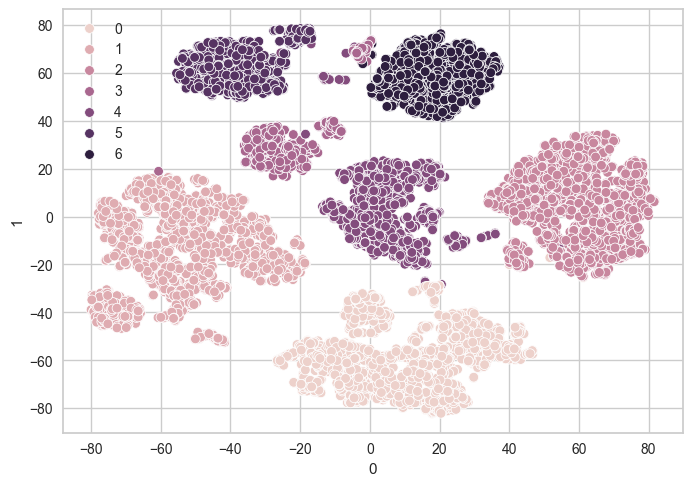

In [64]:
sns.scatterplot(df_tsne, x=0, y=1, hue=hierarch_kernal_pca.labels_)

- The two algorithms PCA and Kernal PCA show nearly the same results in this problem.

---------------------

## 7. <a name="7" id="7">Other Unsupervised Algorithms</a>

**Expectation-Maximization (EM) (Gaussian Mixture)**

In [68]:
from sklearn.mixture import GaussianMixture

In [69]:
gm = GaussianMixture(init_params='kmeans', n_components=7, random_state=42)
gm_labels_ = gm.fit_predict(df1)

<Axes: xlabel='0', ylabel='1'>

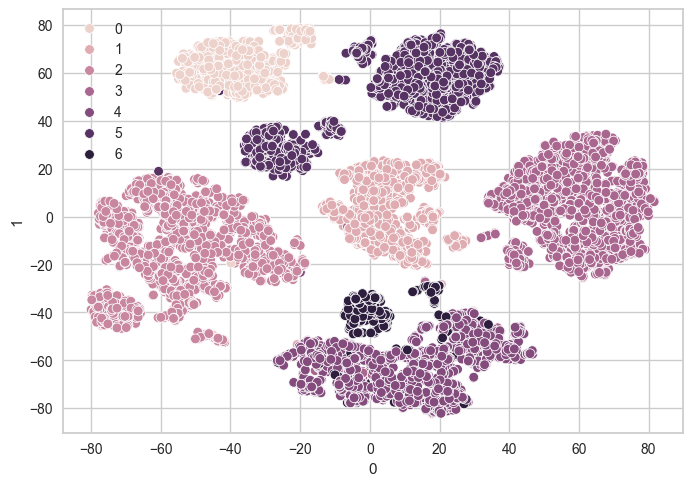

In [70]:
sns.scatterplot(df_tsne, x=0, y=1, hue=gm_labels_)

- It gave fairly good results.

**DBSCAN clustering (Clustring and Anomaly)**

In [29]:
from sklearn.cluster import DBSCAN

In [113]:
dbscan = DBSCAN(eps=2.4, min_samples=50).fit(df1)

<Axes: xlabel='0', ylabel='1'>

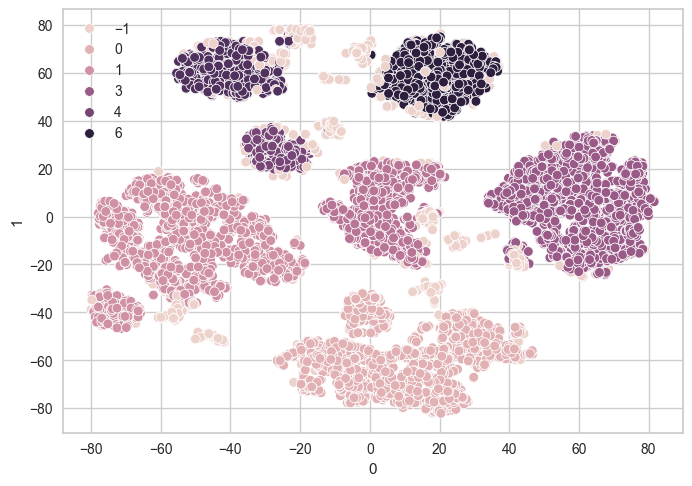

In [114]:
sns.scatterplot(df_tsne, x=0, y=1, hue=dbscan.labels_)

- As I predict before using BDSCAN and Accourding to the distrubution of data and using default params of DBSCAN.
- DBSCAN showed the data as one class because the data points or clusters are overlapped.
- So we should do paramter tuning by trying different values for eps and min_samples to get best clustering for data into 7 clusters.
- Also it is used as anomaly detector, and its result from T-SNE is good.

**Isolated Random Forest**

In [139]:
from sklearn.ensemble import IsolationForest

In [161]:
df1.shape

(8950, 17)

In [166]:
irf = IsolationForest(max_samples= 2000, max_features=17, random_state=0)
irf_labels_ = irf.fit_predict(df1)

<Axes: xlabel='0', ylabel='1'>

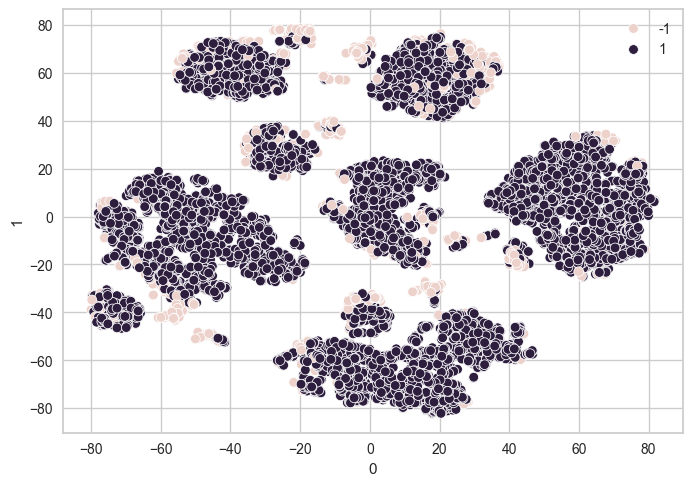

In [167]:
sns.scatterplot(df_tsne, x=0, y=1, hue=irf_labels_)

- Here also we should tune the parameter (n_estimators, max_samples, max_features) to get a good results in detecting anomlies.

-------------------------------------------------------------------------------

## 8. <a name="8">Results</a>

- As conclusion, The unsupervised algorithm that showed the best results accourding to T-SNE is Hierarchical Clustring (Agglomerative Clustering)
- I will use its results (labels) to show the meaning of each cluster (what does each cluster represent?).

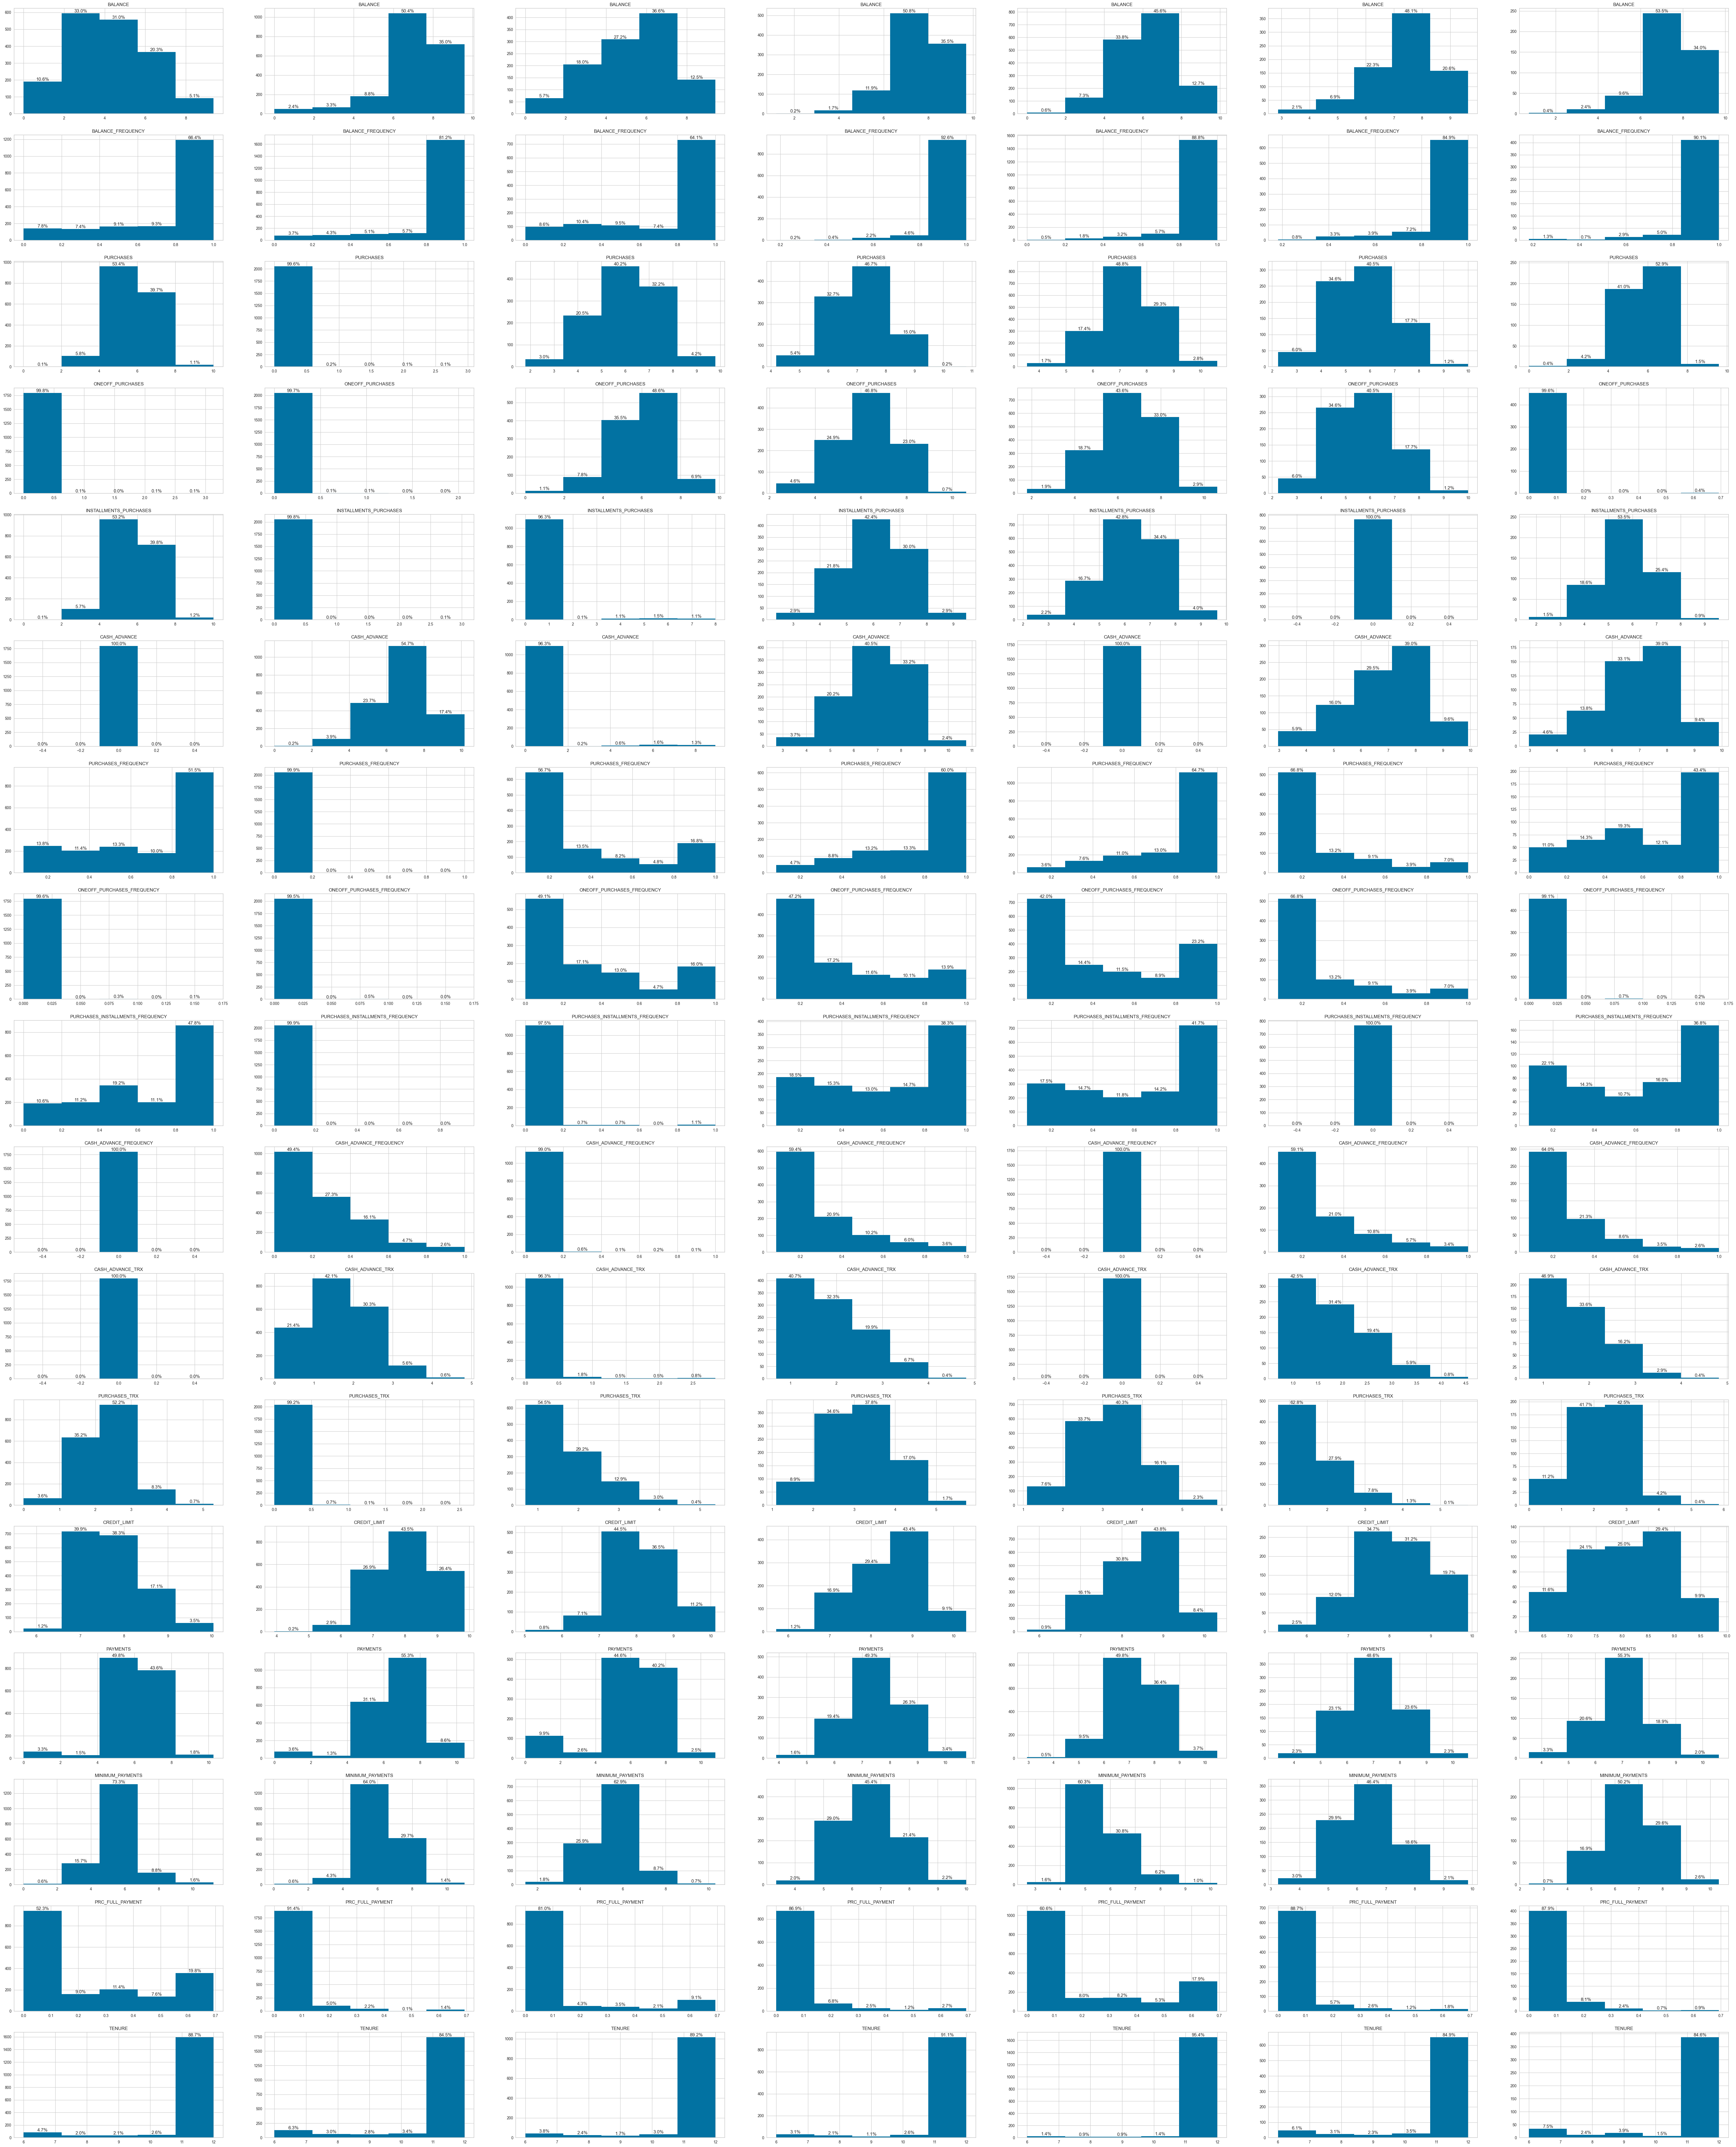

In [126]:
fig, ax = plt.subplots(17, 7, figsize=(80, 100))
for column in df1.columns:    
    for label in range(7):    
        ax[df.columns.get_loc(column), label].hist(df1[column][np.where(hierarch.labels_ == label)[0]], bins=5)
        counts, bins = np.histogram(df1[column][np.where(hierarch.labels_ == label)[0]], bins=5)
        percentages = [(count / len(df1[column][np.where(hierarch.labels_ == label)[0]])) * 100 for count in counts]

        for i in range(len(bins) - 1):
            bin_center = (bins[i] + bins[i + 1]) / 2
            ax[df.columns.get_loc(column), label].text(bin_center, counts[i], f'{percentages[i]:.1f}%', ha='center', va='bottom')

        ax[df.columns.get_loc(column), label].title.set_text(column)

- **Cluster 0**:
    - Customers that don't use cash in advance or purchase in on-go, and make slightly purchases frequently. 
- **Cluster 1**: 
    - Customers that have high balance but don't make any activities or purchases.
- **Cluster 2**:
    - Customers that have slightly high balance and make slightly high different purchases except installments or cash in advance that arn't used nearly. In the same time their frequency is low that may be means those customers buy expensive products(Amount of purchase is slightly high and frequences is low).
- **Cluster 3**: 
    - Customeres that have high balance, amount of purchases is not high or low, but at the same time frequences of different purchases are high. So unlike pervious cluster, those customers buy cheap products.
- **Cluster 4**: 
    - Customerss that make slightly high different purchases except cash in advance and frequencies are also high. Those customers like to buy different types of products with different prices.
- **Cluster 5**: 
    - Customers that have slightly high balane and make slightly high purchases and also cush in advance. but not like to do installment purchases at all so The installments offers won't be suitable for them. They also make purchases not frequently.
- **Cluster 6**: 
    - Customers with high balance, make slightly high purchases and cash in advance. Thier frequencies of purchases (also installments) are very high. So those customers will be suitable with them the offers.

During Analysis the classes. I found that there is a difference but also high similarity between clusters 2 and 5. So I think if the business prefered to decrease the number of classes to can deal with customers in proper way. I recommend to merge cluster 2 and 5.